<center><h1 style="color: #555555;">Experience Script Documentation</h1></center>

<div align="center">
    <table style="width: 80%; border-collapse: collapse;">
        <tr>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Context</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Approach</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Value Created</th>
        </tr>
        <tr>
            <td style="background-color: #E8F4FC; padding: 10px;">Provide the background and purpose of the script.</td>
            <td style="background-color: #E8F4FC; padding: 10px;">Describe the libraries, methods, and thought process.</td>
            <td style="background-color: #E8F4FC; padding: 10px;">Highlight the outcomes, improvements, and conclusions.</td>
        </tr>
    </table>
</div>
</html>

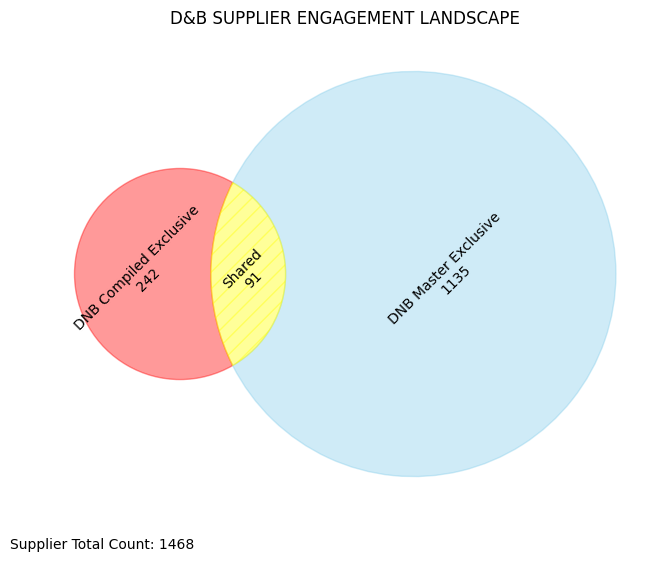

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the dataset
df = pd.read_csv('DNB Supplier Master 4.30.24.csv')

# Calculate the counts for each SOURCE_STATUS
status_counts = df['SOURCE_STATUS'].value_counts()

# Extract counts for the Venn diagram
exclusive_master = status_counts.get('DNB Master Exclusive', 0)
exclusive_compiled = status_counts.get('DNB Compiled Exclusive', 0)
shared = status_counts.get('Shared', 0)

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(exclusive_compiled, exclusive_master, shared),
      set_labels=(' ', ' '))

# Customize labels with SOURCE_STATUS and row counts, and tilt them
venn_diagram.get_label_by_id('10').set_text(f'DNB Compiled Exclusive\n{exclusive_compiled}')
venn_diagram.get_label_by_id('10').set_rotation(45)
venn_diagram.get_label_by_id('01').set_text(f'DNB Master Exclusive\n{exclusive_master}')
venn_diagram.get_label_by_id('01').set_rotation(45)
venn_diagram.get_label_by_id('11').set_text(f'Shared\n{shared}')
venn_diagram.get_label_by_id('11').set_rotation(45)

# Adding an external label for 'Supplier Count'
plt.annotate('Supplier Total Count: 1468', xy=(-0.7, -0.5), xytext=(-0.9, -0.7))

# Customize colors of the circles
venn_diagram.get_patch_by_id('10').set_color('red')
venn_diagram.get_patch_by_id('01').set_color('skyblue')
# Add texture to the gray color for the shared area
venn_diagram.get_patch_by_id('11').set_color('yellow')
venn_diagram.get_patch_by_id('11').set_hatch('//')  # This adds a diagonal hatch; change the pattern to customize



# Show the plot
plt.title('D&B SUPPLIER ENGAGEMENT LANDSCAPE')
plt.show()




<Figure size 5000x3000 with 0 Axes>

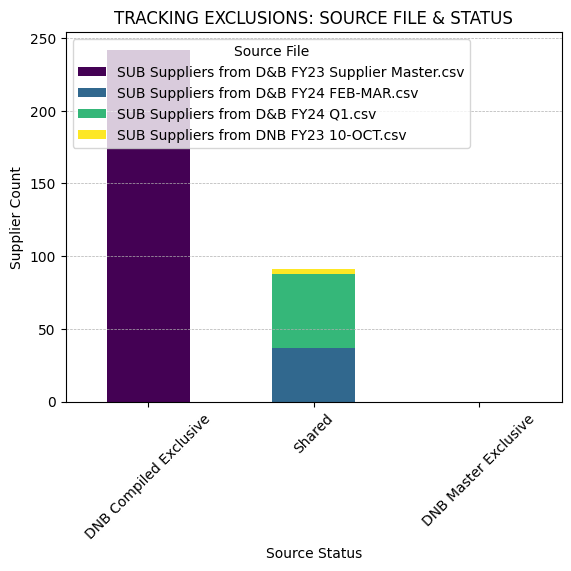

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DNB Supplier Master 4.30.24.csv')

# Prepare the data for plotting
# Grouping data by 'SOURCE_STATUS' and 'SOURCE' to count entries
plot_data = df.groupby(['SOURCE_STATUS', 'SOURCE']).size().unstack(fill_value=0)

# Ensuring all expected categories are present, even if they have zero count
expected_status = ['DNB Compiled Exclusive', 'DNB Master Exclusive', 'Shared']
for status in expected_status:
    if status not in plot_data.index:
        plot_data.loc[status] = 0  # Adding missing categories with zero counts

# Create the bar plot
plt.figure(figsize=(50, 30)) 
plot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Source Status')
plt.ylabel('Supplier Count')
plt.title('TRACKING EXCLUSIONS: SOURCE FILE & STATUS')
plt.xticks(rotation=45)

# Add horizontal grid lines for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Add a legend to explain the colors
plt.legend(title='Source File', loc='upper left')  # Adjust the location of the legend if needed

# Show the plot
plt.show()

